### Michelle Rice
### Term Project Milestone 5
### World Alcohol Consumption

   In order to complete this project, I selected three sources of data with information about alcohol consumption around the world.  This assignment was a very good experience in the process of combining data from different sources and finding ways to join them.  As I went through the process, I realized that one of my datasets did not really have information that I could join to my other two datasets or that was really relevant to the same type of analysis, so I decided it was best to find a different source.  
    
   I have some prior experience with SQL and databases, so I felt fairly comfortable with this, however writing join statements is one thing that I have always felt less confident with, so this was a great learning and practice experience and I definitely feel more comfortable with this now.  There were still a few things that confused me, for example I had a situation where I thought the join would not keep duplicate columns and it did, so I had to manually list the columns I wanted to keep, so this is something I plan to look into more. I also struggled a bit with the syntax when creating the graphs and could use more practice with this.  In some cases with my selects and my graphs, I felt like I got it working, but I still wasn’t sure that the way I did it was the best or easiest way to do it.  As an example, I used row_factory to create lists rather than tuples from my selects so that I could pass that list into my graph, but I feel there should be an easier way to do this rather than doing each select separately, this is something I will explore.  I did have one table that I replaced but then could not get the DROP TABLE code to work, so I have an unused table in my database. now.
    
   One thing that I learned was the importance of cleaning up column names.  I had a few columns that had a special character in them that made it a bit more difficult when I was writing my select statements and creating my graphs, so I ended up going back and doing more cleanup work.  I also now see how helpful little things like changing everything to lower case is when you start working with it.
    
   A couple of other observations that I made was that I had a few columns that were named different but had the same information, but the values were slightly different.  I just chose one to use, but this might have been a case where I could have done more analysis on the difference and determined if one was more reliable or used an average of the two or something other than just randomly choosing one.  I also had situations where I just had way too much data when I created my graphs and had to figure out how to break them down in a way that made sense or just eliminate some of the data.
    
   Overall, I really enjoyed working on this project and found it very valuable.  I also have more ideas of ways that I could continue to analyze this data.  


In [1]:
# import necessary libraries
import sqlite3
import pandas as pd

In [2]:
# create a connection to the database
conn = sqlite3.connect("alcohol_db")

In [3]:
# write a function to test the connection
def is_opened(conn):
    try:
        conn.execute("SELECT * FROM Consumption LIMIT 1")
        return True
    except sqlite3.ProgrammingError as e:
        print("Connection closed {}".format(e))
        return False

In [4]:
# run the function to test the connection
print (is_opened(conn))

True


In [5]:
# create the connection cursor
c = conn.cursor()

In [6]:
# I added the code to add the tables to the databse in my separate notebooks
# that I created for each milestone, so here I am checking to make sure the tables 
# are in the database.  Example code used to add tables:
# consumption1.to_sql("Consumption", con=conn, if_exists="append", index=False)
c.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(c.fetchall())

[('Consumption',), ('Alcohol_Consumption',), ('Countries',), ('Percent_Consumption',)]


In [7]:
# join the tables in one dataframe and view the first few rows
merged_df = pd.read_sql('''SELECT A.country, year, liters, total, beer_pct, wine_pct, spirits_pct, other_pct, "2020projection", "2025projection", region, happinessscore, gdp_percapita, beer_percapita, wine_percapita, total_percapita FROM Countries A LEFT JOIN Percent_Consumption B ON A.country = B.country LEFT JOIN Consumption C ON A.country = C.country where B.country is not NULL AND C.Country is not NULL And year = 2018 ORDER BY A.country''', conn)
merged_df.head()

,country,year,liters,total,beer_pct,wine_pct,spirits_pct,other_pct,2020projection,2025projection,region,happinessscore,gdp_percapita,beer_percapita,wine_percapita,total_percapita
0,Albania,2018,7.17,7.5,34.3,26.5,37.6,1.7,8.3,9.2,Central and Eastern Europe,4.655,4.132,89,54,275
1,Angola,2018,6.94,6.4,70.3,17.6,11.3,0.8,6.1,6.6,Sub-Saharan Africa,3.866,3.309,217,45,319
2,Argentina,2018,9.65,9.8,39.9,40.2,9.6,10.3,10.0,10.3,Latin America and Caribbean,6.650,12.654,193,221,439
3,Armenia,2018,5.55,5.5,10.6,7.0,82.3,0.1,5.7,6.1,Central and Eastern Europe,4.360,3.606,21,11,211
4,Australia,2018,10.51,10.6,39.9,37.5,12.9,9.8,10.5,10.3,Australia and New Zealand,7.313,49.897,261,212,545


In [8]:
# view the size of the dataframe
merged_df.shape

(111, 16)

In [9]:
# import libraries needed for graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### For my first visualization, I chose to focus on the happiness index and GDP and see if I could identify a relationship between them and alcohol consumption.  I used a scatterplot for this.

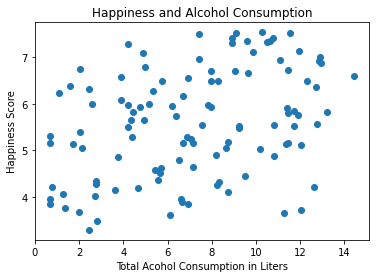

In [10]:
# create scatter plot of alcohol and happiness
plt.scatter(merged_df['liters'], merged_df['happinessscore'])
plt.title("Happiness and Alcohol Consumption")
plt.ylabel("Happiness Score")
plt.xlabel("Total Acohol Consumption in Liters")
plt.show()

##### Looking at the plot, there does not appear to be an obvious trend or relationship between alcohol consumption and happiness score.  Next I'll look at GDP

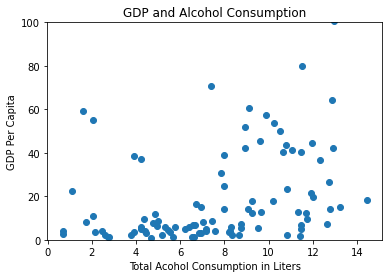

In [11]:
# create scatterplot of alcohol consumption and GDP
plt.scatter(merged_df['liters'], merged_df['gdp_percapita'])
plt.title("GDP and Alcohol Consumption")
plt.ylim(0, 100)
plt.ylabel("GDP Per Capita")
plt.xlabel("Total Acohol Consumption in Liters")
plt.show()

##### Again, there does not appear to be a clear relationship between the two.  Out of curiosity, I decided to take alcohol consumption out of the analysis for one graph and see if happiness and GDP have a correlation.

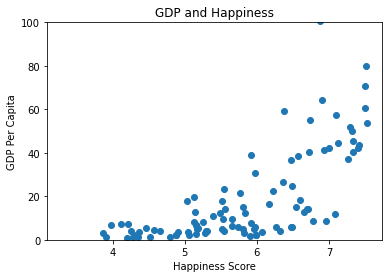

In [12]:
# create scatter plot of GDP and happiness score
plt.scatter(merged_df['happinessscore'], merged_df['gdp_percapita'])
plt.ylim(0, 100)
plt.title("GDP and Happiness")
plt.ylabel("GDP Per Capita")
plt.xlabel("Happiness Score")
plt.show()

##### It does appear from this plot that there is a relationship where countries with higher GDP have a correlation to higher happiness score

##### Next I would like to do some analysis based on region, so I created a dataframe from a select statement to group countries by region

In [13]:
# group countries by region and put into a new dataframe
region_df = pd.read_sql('''SELECT A.country, year, liters, total, "beer_pct", "wine_pct", "spirits_pct", "other_pct", "2020projection", "2025projection", region, happinessscore, gdp_percapita, beer_percapita, wine_percapita, total_percapita FROM Countries A LEFT JOIN Percent_Consumption B ON A.country = B.country LEFT JOIN Consumption C ON A.country = C.country where B.country is not NULL AND C.Country is not NULL And year = 2018 ORDER BY region''', conn)
region_df

,country,year,liters,total,beer_pct,wine_pct,spirits_pct,other_pct,2020projection,2025projection,region,happinessscore,gdp_percapita,beer_percapita,wine_percapita,total_percapita
0,Australia,2018,10.51,10.6,39.9,37.5,12.9,9.8,10.5,10.3,Australia and New Zealand,7.313,49.897,261,212,545
1,New Zealand,2018,10.63,10.7,37.4,33.4,28.9,0.3,10.6,10.4,Australia and New Zealand,7.334,40.332,203,175,457
2,Albania,2018,7.17,7.5,34.3,26.5,37.6,1.7,8.3,9.2,Central and Eastern Europe,4.655,4.132,89,54,275
3,Armenia,2018,5.55,5.5,10.6,7.0,82.3,0.1,5.7,6.1,Central and Eastern Europe,4.360,3.606,21,11,211
4,Azerbaijan,2018,4.41,0.8,61.5,36.9,0.0,1.5,0.7,0.9,Central and Eastern Europe,5.291,3.881,21,5,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Portugal,2018,12.03,12.3,26.1,61.5,7.7,4.7,11.8,11.0,Western Europe,5.123,19.872,194,339,600
107,Spain,2018,12.72,10.0,54.2,18.0,27.8,0.0,9.6,8.9,Western Europe,6.361,26.617,284,112,553
108,Sweden,2018,8.93,9.2,36.4,47.8,14.1,1.7,9.8,10.1,Western Europe,7.291,51.845,152,186,398
109,Switzerland,2018,11.53,11.5,32.1,48.1,18.5,1.2,10.9,10.3,Western Europe,7.509,79.866,185,280,565


In [14]:
# from the regional dataframe sum the total consumption for each region
c.execute("Select region, SUM(total) FROM Percent_Consumption A JOIN Consumption B on A.country = B.country GROUP BY B.region")
region_total = c.fetchall()
region_total

[('Australia and New Zealand', 21.299999999999997),
 ('Central and Eastern Europe', 241.29999999999995),
 ('Eastern Asia', 32.800000000000004),
 ('Latin America and Caribbean', 143.39999999999998),
 ('Middle East and Northern Africa', 18.9),
 ('North America', 18.700000000000003),
 ('Southeastern Asia', 31.9),
 ('Sub-Saharan Africa', 132.70000000000002),
 ('Western Europe', 213.29999999999995)]

In [15]:
# since I want to use this in a graph it will be easier to work with to select the region 
# and total separately as lists
# used row_factory to return a list instead of a tuple
c.execute("Select region FROM Consumption GROUP BY region")
c.row_factory = lambda cursor, row: row[0]
region = c.fetchall()
region

['Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Sub-Saharan Africa',
 'Western Europe']

In [16]:
# create list of total consumption by region
c.execute("Select SUM(total) FROM Percent_Consumption A JOIN Consumption B on A.country = B.country GROUP BY B.region")
region_total = c.fetchall()
region_total

[21.299999999999997,
 241.29999999999995,
 32.800000000000004,
 143.39999999999998,
 18.9,
 18.700000000000003,
 31.9,
 132.70000000000002,
 213.29999999999995]

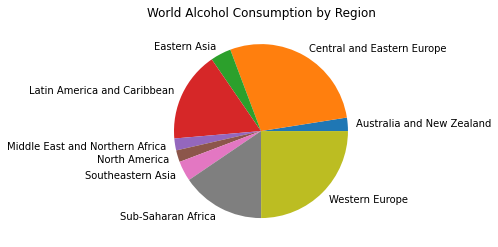

In [17]:
# Create a pie chart to show Consumption by Region

plt.figure()

plt.pie(region_total, labels = region)
plt.title("World Alcohol Consumption by Region")
plt.show()

##### The pie chart shows the total world alcohol consumption per region. European countries have a clearly larger amount of consumption than other regions.

##### Next I decided to do some analysis on types of alcohol consumed

In [18]:
# For the United States only, select the percents of each type of alcohol consumed
c = conn.cursor()
c.execute("Select country, beer_pct, wine_pct, spirits_pct, other_pct FROM Percent_Consumption WHERE country = 'United States'")
c.fetchall()

[('United States', 47.0, 18.1, 34.9, 0.0)]

In [19]:
# Select percent of each type of alcohol for North America
NAmerica_type = pd.read_sql('''SELECT A.country, total, beer_pct, wine_pct, spirits_pct, other_pct, B.region FROM Percent_Consumption A JOIN Consumption B ON A.country = B.country Where region = "North America"''', conn)
NAmerica_type

,country,total,beer_pct,wine_pct,spirits_pct,other_pct,region
0,Canada,8.9,45.1,25.6,25.6,3.7,North America
1,United States,9.8,47.0,18.1,34.9,0.0,North America


In [20]:
# Select percent of each type of alcohol for Central and Eastern Europe
CEEurope_type = pd.read_sql('''SELECT A.country, total, beer_pct, wine_pct, spirits_pct, other_pct, B.region FROM Percent_Consumption A JOIN Consumption B ON A.country = B.country Where region="Central and Eastern Europe"''', conn)
CEEurope_type.head()

,country,total,beer_pct,wine_pct,spirits_pct,other_pct,region
0,Czech Republic,14.4,53.3,21.3,25.4,0.0,Central and Eastern Europe
1,Slovakia,11.5,33.7,20.9,41.9,3.5,Central and Eastern Europe
2,Uzbekistan,2.7,34.4,8.6,56.9,0.0,Central and Eastern Europe
3,Kazakhstan,7.7,30.5,6.5,62.9,0.0,Central and Eastern Europe
4,Moldova,15.2,16.2,56.6,25.2,2.0,Central and Eastern Europe


In [21]:
# Select percent of each type of alcohol for Western Europe
WEurope_type = pd.read_sql('''SELECT A.country, total, beer_pct, wine_pct, spirits_pct, other_pct, B.region FROM Percent_Consumption A JOIN Consumption B ON A.country = B.country Where region="Western Europe"''', conn)
WEurope_type.head()

,country,total,beer_pct,wine_pct,spirits_pct,other_pct,region
0,Denmark,10.4,37.4,44.7,17.1,0.8,Western Europe
1,Switzerland,11.5,32.1,48.1,18.5,1.2,Western Europe
2,Iceland,9.1,56.5,27.9,15.5,0.0,Western Europe
3,Norway,7.5,43.9,36.7,16.7,2.7,Western Europe
4,Finland,10.7,48.8,20.6,21.5,9.1,Western Europe


In [22]:
# Select percent of each type of alcohol for Latin America and Caribbean
LAmCarib_type = pd.read_sql('''SELECT A.country, total, beer_pct, wine_pct, spirits_pct, other_pct, B.region FROM Percent_Consumption A JOIN Consumption B ON A.country = B.country Where region="Latin America and Caribbean"''', conn)
LAmCarib_type.head()

,country,total,beer_pct,wine_pct,spirits_pct,other_pct,region
0,Costa Rica,4.8,64.1,7.2,27.9,0.8,Latin America and Caribbean
1,Brazil,7.8,61.8,3.4,34.3,0.5,Latin America and Caribbean
2,Mexico,6.5,77.1,2.1,20.4,0.5,Latin America and Caribbean
3,Chile,9.3,36.1,33.1,30.8,0.0,Latin America and Caribbean
4,Panama,7.9,76.9,3.5,19.4,0.3,Latin America and Caribbean


##### Since there was way too much data for one graph, I decided to create a separate graph for each region which shows each country withiin that region and how their alcohol consumption is broken down by beer, wine, spirits and other

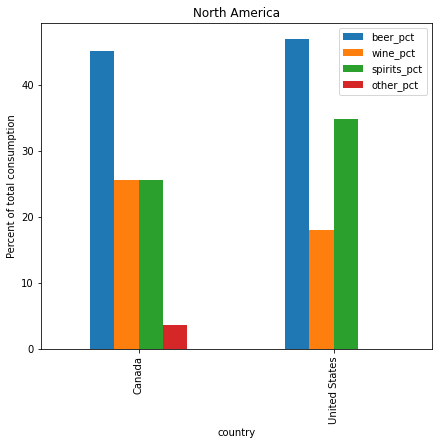

In [23]:
# create bar plot of North America breakdown
NAmerica_type.plot(x="country", y=["beer_pct", "wine_pct", "spirits_pct", "other_pct"], kind="bar",figsize=(7,6))
plt.title("North America")
plt.ylabel("Percent of total consumption")
plt.show()


##### Beer seems to be the favored choice in North America

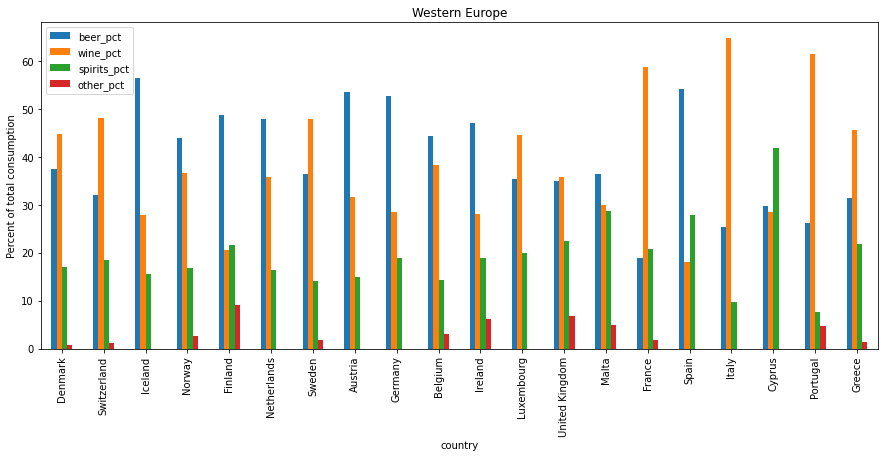

In [24]:
# create bar plot of Western Europe breakdown
WEurope_type.plot(x="country", y=["beer_pct", "wine_pct", "spirits_pct", "other_pct"], kind="bar",figsize=(15,6))
plt.title("Western Europe")
plt.ylabel("Percent of total consumption")
plt.show()

##### In Western European countries, wine has a much stronger presence, especially in Italy and France, as we would expect.

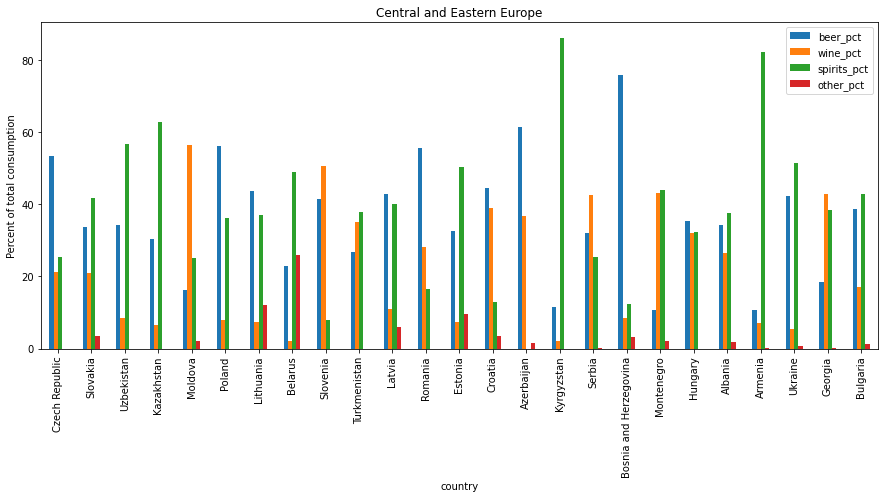

In [25]:
# create bar plot of Central and Eastern Europe breakdown
CEEurope_type.plot(x="country", y=["beer_pct", "wine_pct", "spirits_pct", "other_pct"], kind="bar",figsize=(15,6))
plt.title("Central and Eastern Europe")
plt.ylabel("Percent of total consumption")
plt.show()

##### In Central and Eastern Europe we see a higher percentage of spirits than we did in other regions

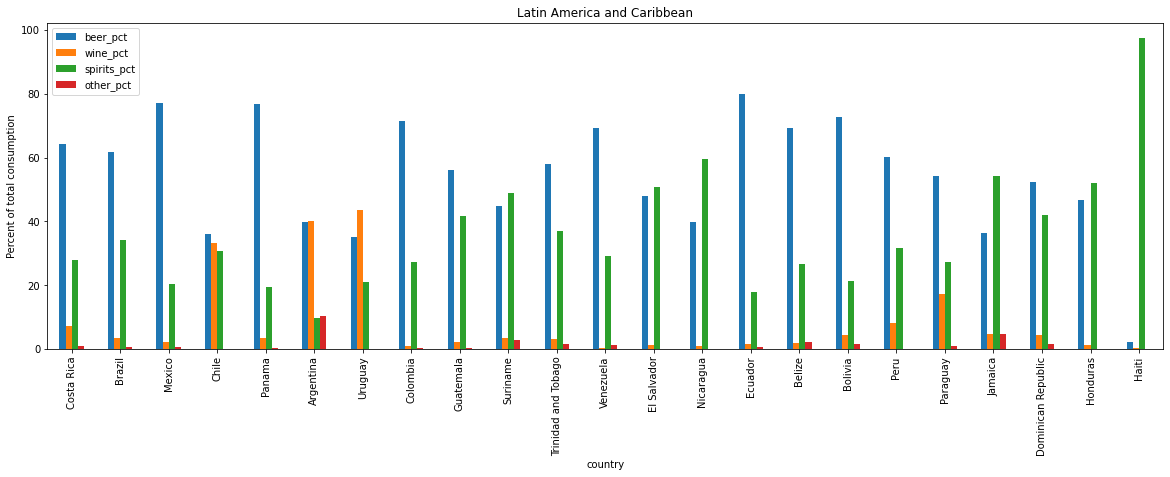

In [26]:
# create bar plot of Latin America and Caribbean breakdown
LAmCarib_type.plot(x="country", y=["beer_pct", "wine_pct", "spirits_pct", "other_pct"], kind="bar",figsize=(20,6))
plt.title("Latin America and Caribbean")
plt.ylabel("Percent of total consumption")
plt.show()

##### Latin America and the Caribbean also show a strong presence of spirits, along with beer, with only a few countries having much wine consumption at all.

##### One of my datasets included projections of how the consumption would change by 2020 and 2025 (current data was from 2018) so I would like to compare some of those projections.  This was a situation where my initial graph had too many lines and didn't make sense, so I selected a handful of countries that I was interested in to compare.

In [27]:
# Select the current total and projection values for a small set of countries
country_proj= pd.read_sql('''Select A.country, total, "2020projection", "2025projection" FROM Percent_Consumption A JOIN Consumption B ON A.country = B.country WHERE A.country IN ("United States", "Italy", "Germany", "Ireland", "United Kingdom", "France", "Canada", "Mexico")''', conn)
country_proj

,country,total,2020projection,2025projection
0,Germany,13.4,12.8,12.6
1,Ireland,13.0,13.5,13.9
2,France,12.6,12.3,12.1
3,United Kingdom,11.4,11.5,11.8
4,United States,9.8,10.1,10.3
5,Canada,8.9,9.1,9.2
6,Italy,7.5,7.0,6.1
7,Mexico,6.5,7.0,7.7


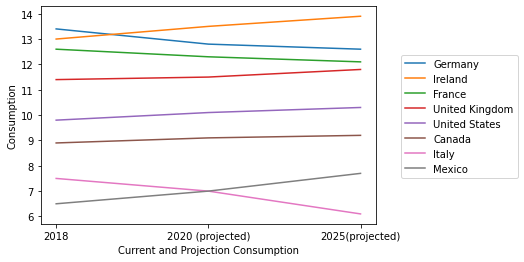

In [30]:
# create a line graph of current totals and projections
year = [2018, '2020 (projected)', '2025(projected)']
consumption = [country_proj.total, country_proj['2020projection'], country_proj['2025projection']]
country = country_proj.country
plt.plot(year, consumption, label=country)
plt.xlabel('Current and Projection Consumption')
plt.ylabel('Consumption')
plt.legend(country, loc='upper center', bbox_to_anchor=(1.25, 0.8))

##### I found it interesting in this graph that while most countries stayed fairly level or had a slight increase projected, Germany, France and Italy all had projected declines. I would be interested to see why those were projected to decline and how the actual data compares for those years after it is collected.

##### For my final graphical analysis, I chose to do a stacked bar to compare totals and then beer vs. wine within them.  This is different than the previous breakdown by type of alcohol as that was percent of consumption while this is actual consumption amount of each and this data was only available for beer and wine, not spirits or other.  I used my small subset of countries again and then also did a graph by region rather than country.

In [31]:
# Select beer and wine totals by country
country_type= pd.read_sql('''Select country, beer_percapita, wine_percapita FROM Consumption WHERE country IN ("United States", "Italy", "Germany", "Ireland", "United Kingdom", "France", "Canada", "Mexico")''', conn)
country_type

,country,beer_percapita,wine_percapita
0,Canada,240,100
1,United States,249,84
2,Germany,346,175
3,Ireland,313,165
4,Mexico,238,5
5,United Kingdom,219,195
6,France,127,370
7,Italy,85,237


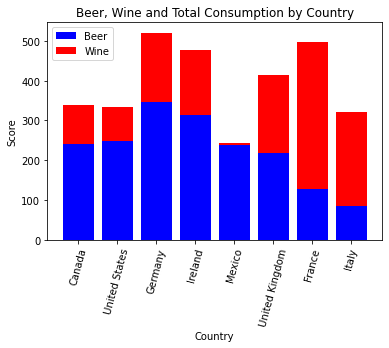

In [32]:
# plot bars in stack manner
x = country_type.country
y1 = country_type.beer_percapita
y2 = country_type.wine_percapita

plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')

plt.xlabel("Country")
plt.ylabel("Score")
plt.legend(["Beer", "Wine"])
plt.title("Beer, Wine and Total Consumption by Country")
figsize=(30,5)
plt.xticks(rotation=75)
plt.show()

In [33]:
# group countries by region and select total beer and wine consumption
c.row_factory = lambda cursor, row: row[0]
c.execute("Select region, SUM(beer_percapita), SUM(wine_percapita) FROM Consumption GROUP BY region")
region = c.fetchall()
region

['Australia and New Zealand',
 'Central and Eastern Europe',
 'Eastern Asia',
 'Latin America and Caribbean',
 'Middle East and Northern Africa',
 'North America',
 'Southeastern Asia',
 'Sub-Saharan Africa',
 'Western Europe']

In [34]:
# group countries by region and select total beer and wine consumption
c.row_factory = lambda cursor, row: row[0]
c.execute("Select SUM(beer_percapita) FROM Consumption GROUP BY region")
reg_beer = c.fetchall()
reg_beer

[464, 4592, 373, 3668, 273, 489, 398, 2197, 4329]

In [35]:
# group countries by region and select total beer and wine consumption
c.row_factory = lambda cursor, row: row[0]
c.execute("Select SUM(wine_percapita) FROM Consumption GROUP BY region")
reg_wine = c.fetchall()
reg_wine

[387, 2263, 41, 823, 114, 184, 15, 342, 3956]

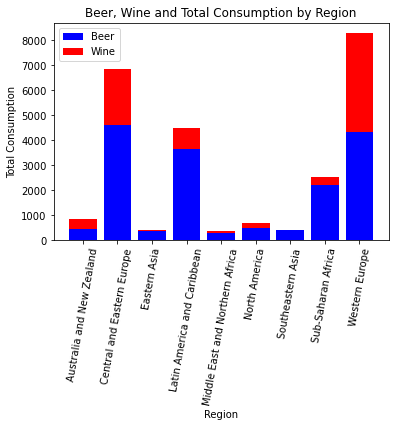

In [37]:
# plot bars in stack manner

# create data

x = region
y1 = reg_beer
y2 = reg_wine

plt.bar(x, y1, color='b')
plt.bar(x, y2, bottom=y1, color='r')

plt.xlabel("Region")
plt.ylabel("Total Consumption")
plt.legend(["Beer", "Wine"])
plt.title("Beer, Wine and Total Consumption by Region")
figsize=(30,10)
plt.xticks(rotation=80)
plt.show()

##### Again we see European countries displaying higher consumption overall and also see more wine consumption there than all other regions.

##### I'm thinking there may be a way to do this with less steps than I have done to create each list for the graph, this is something I will continue to explore